# Formulation of the CVRP as programmed in my Master's Thesis

Packages importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
import pandas as pd

Data importation:

In [2]:
c = np.loadtxt("dist.txt")
c
## Distance matrix adds a cost to use the first arc so the use of a vehicle is included

array([[   0.  , 2248.94, 2162.05, 2179.39, 2113.79, 2158.09, 2145.8 ,
        2116.1 , 2159.  , 2179.25, 2201.1 , 2178.47, 2125.  ],
       [  38.94,    0.  ,  137.42,  185.46,  132.97,  134.18,  169.15,
         123.05,  197.93,  208.64,  212.71,  198.14,  154.06],
       [  32.05,  217.42,    0.  ,  178.09,  125.65,  134.  ,  161.76,
         116.6 ,  191.05,  203.85,  210.92,  195.2 ,  149.53],
       [  19.39,  235.46,  148.09,    0.  ,  107.6 ,  149.01,  145.18,
         112.98,  177.48,  197.48,  213.16,  193.92,  143.41],
       [  18.79,  247.97,  160.65,  172.6 ,    0.  ,  161.4 ,  144.  ,
         122.55,  173.47,  197.69,  218.92,  197.21,  143.23],
       [  33.09,  219.18,  139.  ,  184.01,  131.4 ,    0.  ,  165.65,
         117.08,  191.87,  199.95,  203.63,  188.96,  145.22],
       [  10.8 ,  244.15,  156.76,  170.18,  104.  ,  155.65,    0.  ,
         114.84,  167.73,  190.04,  209.95,  188.63,  135.8 ],
       [  16.1 ,  233.05,  146.6 ,  172.98,  117.55,  142.08, 

Some important parameters

In [3]:
# Number of vehicles
Vehic = 6

# Number of clients
Clients = 12

# Big M
M = 100

Sets

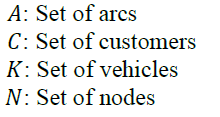

In [4]:
N = [i for i in range(Clients+1)] # Set of clients
C = [i for i in range(1,Clients+1)]
A = [(i,j) for i in N for j in N]
K = [i for i in range(1, Vehic+1)]

Getting the demand of each customer

In [5]:
demand = np.loadtxt("demand2.txt")
d = {i: demand[i] for i in C}

Final parameter, the capacity of the vehicle

In [6]:
q = 20

In [7]:
# Call the model
m = Model("VRP")
m.setParam("TimeLimit",60)

Academic license - for non-commercial use only - expires 2021-04-09
Using license file C:\Users\57316\gurobi.lic
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


Variables:
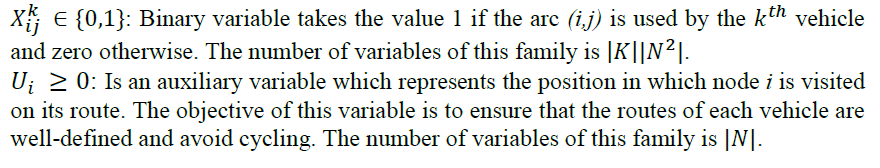

In [8]:
x = m.addVars(A,K,vtype=GRB.BINARY,name="x")
u = m.addVars(N, vtype=GRB.CONTINUOUS,lb=0,ub=Clients+1,name="u")

Objective function
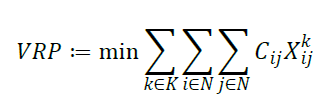

In [9]:
m.modelSense = GRB.MINIMIZE
m.setObjective(quicksum(c[i,j]*x[i,j,k] for i,j in A for k in K))

## Constraints
Every client must be visited once

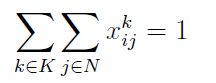

In [10]:
m.addConstrs(quicksum(x[i,j,k] for k in K for j in N)==1 for i in C);

The demand served by a vehicle must be less than its capacity

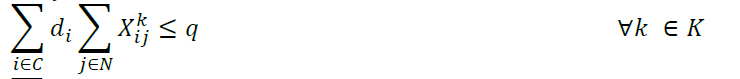

In [11]:
m.addConstrs(quicksum(d[i]*x[i,j,k] for i in C for j in N)<=q for k in K);

Vehicles must get start the route at the depor and finish it there

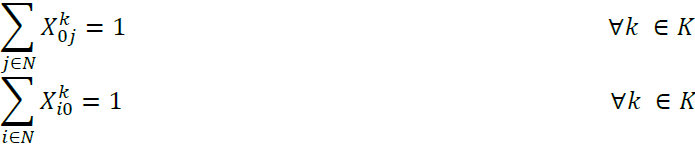

In [12]:
m.addConstrs(quicksum(x[0,j,k] for j in N)==1 for k in K);
m.addConstrs(quicksum(x[i,0,k] for i in N)==1 for k in K);

Flow constraint

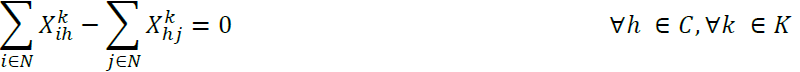

In [13]:
m.addConstrs(quicksum(x[i,h,k] for i in N)-quicksum(x[h,j,k] for j in N)==0 for k in K for h in C);

Subcircuit elimination

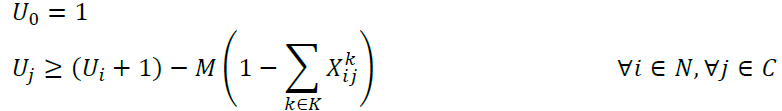

In [14]:
m.addConstr(u[0]==1);
m.addConstrs(u[j]>=(u[i]+1)-M*(1-quicksum(x[i,j,k] for k in K)) for i in N for j in C);

In [15]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 259 rows, 1027 columns and 4981 nonzeros
Model fingerprint: 0xf50b4d59
Variable types: 13 continuous, 1014 integer (1014 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e+00, 2e+03]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 12221.250000
Presolve removed 13 rows and 73 columns
Presolve time: 0.02s
Presolved: 246 rows, 954 columns, 4752 nonzeros
Variable types: 12 continuous, 942 integer (942 binary)

Root relaxation: objective 1.769810e+03, 330 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1769.81000    0   28 12221.2500 1769.81000  85.5%     -    0s
H    0     0                    12015.090000 1

In [16]:
m.getVars()

[<gurobi.Var x[0,0,1] (value 0.0)>,
 <gurobi.Var x[0,0,2] (value 0.0)>,
 <gurobi.Var x[0,0,3] (value 1.0)>,
 <gurobi.Var x[0,0,4] (value 9.01010454189913e-07)>,
 <gurobi.Var x[0,0,5] (value 1.0)>,
 <gurobi.Var x[0,0,6] (value 1.0)>,
 <gurobi.Var x[0,1,1] (value 0.0)>,
 <gurobi.Var x[0,1,2] (value 0.0)>,
 <gurobi.Var x[0,1,3] (value -0.0)>,
 <gurobi.Var x[0,1,4] (value 0.0)>,
 <gurobi.Var x[0,1,5] (value 0.0)>,
 <gurobi.Var x[0,1,6] (value 0.0)>,
 <gurobi.Var x[0,2,1] (value -0.0)>,
 <gurobi.Var x[0,2,2] (value 0.0)>,
 <gurobi.Var x[0,2,3] (value -0.0)>,
 <gurobi.Var x[0,2,4] (value -0.0)>,
 <gurobi.Var x[0,2,5] (value -0.0)>,
 <gurobi.Var x[0,2,6] (value -0.0)>,
 <gurobi.Var x[0,3,1] (value -0.0)>,
 <gurobi.Var x[0,3,2] (value 0.0)>,
 <gurobi.Var x[0,3,3] (value -0.0)>,
 <gurobi.Var x[0,3,4] (value -0.0)>,
 <gurobi.Var x[0,3,5] (value -0.0)>,
 <gurobi.Var x[0,3,6] (value -0.0)>,
 <gurobi.Var x[0,4,1] (value -0.0)>,
 <gurobi.Var x[0,4,2] (value -0.0)>,
 <gurobi.Var x[0,4,3] (value -0.0)

In [17]:
help(GRB.Attr)


  Attributes are used throughout the Gurobi interface to query and
  modify model properties.  You refer to them as you would any
  other object attribute.  For example, "print model.numConstrs"
  prints the number of constraints in a model.  You can assign new values to
  some attributes (e.g., model.ModelName = "New"), while others can only
  be queried.  Note that attribute modification is handled in a lazy fashion,
  so you won't see the effect of a change until after the next call to
  Model.update() or Model.optimize().

  Capitalization is ignored in Gurobi attribute names, so
  model.numConstrs and model.NumConstrs are equivalent.

  Gurobi attributes can be grouped into the following categories:

  General model attributes (e.g., model.numConstrs):

    numConstrs: Number of constraints
    numVars: Number of variables
    numSOS: Number of SOS constraints
    numQConstrs: Number of quadrtic constraints
    numGenConstrs: Number of general constraints
    numNZs: Number of no

In [18]:
m.printAttr("X")


    Variable            X 
-------------------------
    x[0,0,3]            1 
    x[0,0,5]            1 
    x[0,0,6]            1 
    x[0,7,2]            1 
    x[0,8,4]     0.999999 
   x[0,12,1]            1 
    x[1,2,1]            1 
    x[2,0,1]            1 
    x[3,4,2]            1 
    x[4,6,2]            1 
    x[5,1,1]            1 
    x[6,0,2]            1 
    x[7,3,2]            1 
    x[8,9,4]            1 
   x[9,11,4]            1 
   x[10,0,4]     0.999999 
  x[11,10,4]            1 
   x[12,5,1]            1 
        u[0]            1 
        u[1]            4 
        u[2]            5 
        u[3]            3 
        u[4]            4 
        u[5]            3 
        u[6]            5 
        u[7]            2 
        u[8]      1.99991 
        u[9]      2.99991 
       u[10]           13 
       u[11]      3.99991 
       u[12]            2 
